CT-HMM Library 
============================
The document contain the tutorial ( usage explained by example ) for the hidden markov models library [link to pip].
* The **first** part will cover disrete-time hidden markov model (**HMM**)
* The **second** part will be dedicated to continuous-time hidden markov model (**CT-HMM**)

If you are not familiar with the hidden markov model theory, We recommend ...
%todo: refer to DP theory, github, sources

Part 1: Hidden Markov Model
---------------------------------



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cthmm

%matplotlib inline

### Create HMM By Own Defined Parameters 
We will create simple HMM of two hidden states and three output variables.

In [2]:
# A is the matrix of transition probabilities from state [row] to state [column].
A = np.array([[0.9,0.1],[0.4,0.6]])
# B is the matrix of probabilities that the state [row] will emmit output variable [column].
B = np.array([[0.9,0.08,0.02],[0.2,0.5,0.3]])
# pi is the vector of initial state probabilities.   
pi = np.array( [0.8,0.2] )

# Create HMM by given parameters.
hmm = cthmm.HMM(A,B,pi)

### Generate Random State and Emission Sequence
 Now we can use our model to generate state and emission sequence.   
 The model will randomly choose which transition or emission will happen, taking into consideration the parameters we have previously defined.


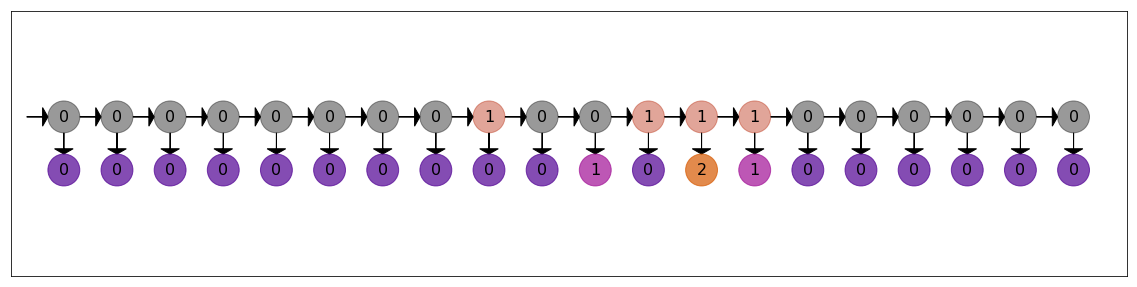

In [3]:
seq_len = 20
s_seq, e_seq = hmm.generate( seq_len )

#resize plot
plt.rcParams['figure.figsize'] = [20,20]

cthmm.plot_hmm( s_seq, e_seq )

### Find Most Likely State Sequence
If we have the model parameters and emission sequence, we can find the most probable state sequence that would generate it. Notice, that it can be different, than the actual sequence that has generated the emissions.  
We will use Viterbi algorithm for the calculation.


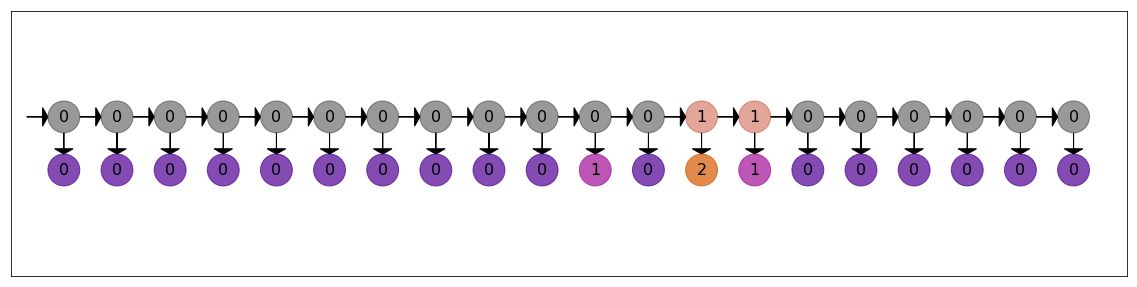

In [4]:
( prob, s_seq ) =  hmm.viterbi( e_seq )
# Let's print the most likely state sequence, it can be same or differ from the sequence above.
cthmm.plot_hmm( s_seq, e_seq )

The *prob* parameter store the probability of the sequence.  
All the probabilities in the library are stored in the logarithm of their actual value. As the number of possible sequences grows exponentialy by it length, it could easily lead to float underflow.  
You can easily transform it to the normal scale value applying *exp* function. 

In [5]:
np.exp( prob )

7.1200867697585345e-06

### The Probability of the Emission Sequence
We can compute the probabilityoft the model generating the emission sequence.

In [6]:
np.exp( hmm.emission_estimate( e_seq ) )

3.3339498160989822e-05

### Create Hidden Markov Model with Random Parameters
We will use *get_random_parameters* function to generate parameters. It takes arguments for number of hidden states and number of observation variables.

In [11]:
hmm_r = cthmm.HMM( *cthmm.get_random_parameters(2,3) )
# We can print all the parameters.
cthmm.print_parameters( hmm_r )

Initial probabilities (π) :


,0
0,0.753903
1,0.246097


Transition probabilities matrix (A):


,0,1
0,0.748358,0.251642
1,0.597341,0.402659


Emission probabilities matrix (B):


,0,1,2
0,0.524244,0.427505,0.048250
1,0.471513,0.137414,0.391073


### Parameters Estimation - Baum Welch Algorithm
We usually do not know the real parameters of the model.  
Here we will have several output variables (emissions) sequences and we will show, how to estimate the model parameters

Let's start by creating some artifficial data. We will use the previously defined model for it.


In [15]:
seq_num = 5
seq_len = 20
data = np.empty( (seq_num, seq_len), dtype=int )

for i in range(seq_num):
    _, data[i] = hmm.generate( seq_len )

Now we can take are randomly initiated model and reestimate it to much the data better.

In [ ]:
print( hmm.esti)